<a href="https://colab.research.google.com/github/tasosnikitakis/Data_Science_Notebooks/blob/main/FBREF_data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df = pd.read_html('https://fbref.com/en/comps/11/2022-2023/2022-2023-Serie-A-Stats')


In [96]:
for idx,table in enumerate(df):
 print("***************************")
 print(idx)
 print(table)

***************************
0
    Rk          Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
0    1         Napoli  38  28   6   4  77  28  49   90    2.37  64.7  31.8   
1    2          Lazio  38  22   8   8  60  30  30   74    1.95  51.1  41.3   
2    3          Inter  38  23   3  12  71  42  29   72    1.89  68.0  36.5   
3    4          Milan  38  20  10   8  64  43  21   70    1.84  58.8  41.1   
4    5       Atalanta  38  19   7  12  66  48  18   64    1.68  57.7  41.4   
5    6           Roma  38  18   9  11  50  38  12   63    1.66  57.4  32.1   
6    7       Juventus  38  22   6  10  56  33  23   62    1.63  55.3  41.6   
7    8     Fiorentina  38  15  11  12  53  43  10   56    1.47  55.0  43.4   
8    9        Bologna  38  14  12  12  53  49   4   54    1.42  43.8  48.7   
9   10         Torino  38  14  11  13  42  41   1   53    1.39  41.8  40.0   
10  11          Monza  38  14  10  14  48  52  -4   52    1.37  45.9  51.3   
11  12        Udinese  38  11  13 

In [69]:
df[20]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Playing Time  \
                Squad               # Pl                Age           MP   
0            Atalanta                 27               26.5           38   
1             Bologna                 27               26.6           38   
2           Cremonese                 33               26.0           38   
3              Empoli                 32               25.3           38   
4          Fiorentina                 30               26.5           38   
5       Hellas Verona                 36               26.6           38   
6               Inter                 25               28.8           38   
7            Juventus                 29               27.7           38   
8               Lazio                 24               28.6           38   
9               Lecce                 29               24.8           38   
10              Milan                 30               26.0           38   
11              Monza                 31               26.6           38   
12             Napoli                 27               26.4           38   
13               Roma                 30               27.4           38   
14        Salernitana                 30               27.2           38   
15          Sampdoria                 40               27.9           38   
16           Sassuolo                 31               26.1           38   
17             Spezia                 34               25.7           38   
18             Torino                 28               25.2           38   
19            Udinese                 30               26.1           38   

                          Starts           ...  Subs Team Success           \
     Min Mn/MP Min%   90s Starts Mn/Start  ... unSub          PPM onG onGA   
0   3420    90  100  38.0    418       80  ...   212         1.68  66   48   
1   3420    90  100  38.0    418       81  ...   261         1.42  53   49   
2   3420    90  100  38.0    418       79  ...   302         0.71  36   69   
3   3420    90  100  38.0    418       80  ...   331         1.13  37   49   
4   3420    90  100  38.0    418       79  ...   323         1.47  53   43   
5   3420    90  100  38.0    418       79  ...   307         0.82  31   59   
6   3420    90  100  38.0    418       81  ...   271         1.89  71   42   
7   3420    90  100  38.0    418       81  ...   240         1.89  56   33   
8   3420    90  100  38.0    418       82  ...   328         1.95  60   30   
9   3420    90  100  38.0    418       81  ...   347         0.95  33   46   
10  3420    90  100  38.0    418       80  ...   321         1.84  64   43   
11  3420    90  100  38.0    418       79  ...   363         1.37  48   52   
12  3420    90  100  38.0    418       82  ...   319         2.37  77   28   
13  3420    90  100  38.0    418       81  ...   307         1.66  50   38   
14  3420    90  100  38.0    418       80  ...   296         1.11  48   62   
15  3420    90  100  38.0    418       80  ...   252         0.50  24   71   
16  3420    90  100  38.0    418       81  ...   291         1.18  47   61   
17  3420    90  100  38.0    418       81  ...   310         0.82  31   62   
18  3420    90  100  38.0    418       82  ...   304         1.39  42   41   
19  3420    90  100  38.0    418       82  ...   259         1.21  47   48   

             Team Success (xG)                      
   +/- +/-90              onxG onxGA xG+/- xG+/-90  
0   18  0.47              57.7  41.4  16.3    0.43  
1    4  0.11              43.8  48.7  -4.9   -0.13  
2  -33 -0.87              38.7  66.1 -27.4   -0.72  
3  -12 -0.32              38.8  58.3 -19.5   -0.51  
4   10  0.26              55.0  43.4  11.7    0.31  
5  -28 -0.74              35.8  49.9 -14.1   -0.37  
6   29  0.76              68.0  36.5  31.6    0.83  
7   23  0.61              55.3  41.6  13.7    0.36  
8   30  0.79              51.1  41.3   9.8    0.26  
9  -13 -0.34              36.1

In [97]:
squad_standard_stats = df[2]
squad_standard_stats.columns = squad_standard_stats.columns.droplevel()
squad_goalkeeping_stats = df[4]
squad_goalkeeping_stats.columns = squad_goalkeeping_stats.columns.droplevel()
squad_advanced_goalkeeping_stats = df[6]
squad_advanced_goalkeeping_stats.columns = squad_advanced_goalkeeping_stats.columns.droplevel()
squad_shooting_stats = df[8]
squad_shooting_stats.columns = squad_shooting_stats.columns.droplevel()
squad_passing_stats = df[10]
squad_passing_stats.columns = squad_passing_stats.columns.droplevel()
squad_pass_type_stats = df[12]
squad_pass_type_stats.columns = squad_pass_type_stats.columns.droplevel()
squad_goal_and_shot_creation_stats = df[14]
squad_goal_and_shot_creation_stats.columns = squad_goal_and_shot_creation_stats.columns.droplevel()
squad_defensive_action_stats = df[16]
squad_defensive_action_stats.columns = squad_defensive_action_stats.columns.droplevel()
squad_possesion_stats = df[18]
squad_possesion_stats.columns = squad_possesion_stats.columns.droplevel()
squad_misc_stats = df[20]
squad_misc_stats.columns = squad_misc_stats.columns.droplevel()

,Squad,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
0,Atalanta,27,49.9,38.0,23862,2217,7478,10221,6382,956,...,13148,67208,33188,687,565,210,619,387,15359,1628
1,Bologna,27,54.7,38.0,24552,2551,8483,11383,4893,592,...,14223,70806,35047,564,487,113,582,305,16622,1358
2,Cremonese,33,42.1,38.0,19346,2538,7184,8051,4334,678,...,9843,51780,26321,521,394,101,553,297,10770,1100
3,Empoli,32,47.3,38.0,21188,2962,8175,8766,4485,674,...,11736,64438,31714,608,452,135,552,372,13050,1105
4,Fiorentina,30,56.1,38.0,23123,2028,6652,10361,6366,977,...,13434,77635,39528,789,601,194,572,345,15234,1607
5,Hellas Verona,36,41.2,38.0,18056,2231,6320,7844,4147,636,...,8665,47590,22382,503,359,103,577,329,9350,1051
6,Inter,25,55.7,38.0,25128,2720,8300,11127,5922,953,...,14972,75152,38723,668,492,141,505,261,17526,1613
7,Juventus,29,49.6,38.0,22810,2432,7514,10435,5077,817,...,12888,66636,34490,673,496,145,583,350,15118,1389
8,Lazio,24,52.1,38.0,25453,2536,8100,12315,5243,769,...,14379,73160,36610,683,484,182,528,290,18009,1368
9,Lecce,29,41.3,38.0,18839,2129,6291,8105,4660,606,...,9288,51809,25326,515,366,119,626,329,9976,1219


In [ ]:
shooting = pd.read_html('https://fbref.com/en/comps/12/shooting/La-Liga-Stats')

In [ ]:
for idx,table in enumerate(shooting):
    print("********************")
    print(idx)
    print(table)

********************
0
   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard          \
                Squad               # Pl                90s      Gls  Sh SoT   
0              Alavés                 16                1.0        0  10   2   
1             Almería                 20                2.0        1  39  13   
2       Athletic Club                 18                2.0        2  15   3   
3     Atlético Madrid                 19                2.0        3  19   7   
4           Barcelona                 18                2.0        2  37  13   
5               Betis                 17                2.0        2  26   5   
6               Cádiz                 19                2.0        1  22   4   
7          Celta Vigo                 18                2.0        1  28   6   
8              Getafe                 16                2.0        0  14   4   
9              Girona                 17                2.0        4  13   7   
10            Gra

In [ ]:
shooting = pd.DataFrame(shooting[0])

In [ ]:
shooting.columns = shooting.columns.droplevel()

In [ ]:
shooting.columns

Index(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG'],
      dtype='object')

In [ ]:
shooting

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Alavés,16,1.0,0,10,2,20.0,10.0,2.0,0.00,0.00,22.1,0,0,0,0.3,0.3,0.03,-0.3,-0.3
1,Almería,20,2.0,1,39,13,33.3,19.5,6.5,0.03,0.08,18.5,0,0,0,2.7,2.7,0.07,-1.7,-1.7
2,Athletic Club,18,2.0,2,15,3,20.0,7.5,1.5,0.13,0.67,15.7,1,0,0,2.0,2.0,0.13,0.0,0.0
3,Atlético Madrid,19,2.0,3,19,7,36.8,9.5,3.5,0.16,0.43,14.3,0,0,0,2.8,2.8,0.15,0.2,0.2
4,Barcelona,18,2.0,2,37,13,35.1,18.5,6.5,0.05,0.15,17.2,3,0,0,4.6,4.6,0.13,-2.6,-2.6
5,Betis,17,2.0,2,26,5,19.2,13.0,2.5,0.08,0.40,17.8,1,0,0,1.8,1.8,0.07,0.2,0.2
6,Cádiz,19,2.0,1,22,4,18.2,11.0,2.0,0.05,0.25,15.1,1,0,0,1.8,1.8,0.08,-0.8,-0.8
7,Celta Vigo,18,2.0,1,28,6,21.4,14.0,3.0,0.04,0.17,17.1,1,0,0,2.0,2.0,0.08,-1.0,-1.0
8,Getafe,16,2.0,0,14,4,28.6,7.0,2.0,0.00,0.00,17.1,1,0,0,1.3,1.3,0.09,-1.3,-1.3
9,Girona,17,2.0,4,13,7,53.8,6.5,3.5,0.31,0.57,14.3,1,0,0,2.2,2.2,0.17,1.8,1.8


In [ ]:
top4 = ['Real Madrid','Sevilla','Barcelona','Atlético Madrid']

In [ ]:
subset_shooting = shooting[shooting['Squad'].isin(top4)]

''

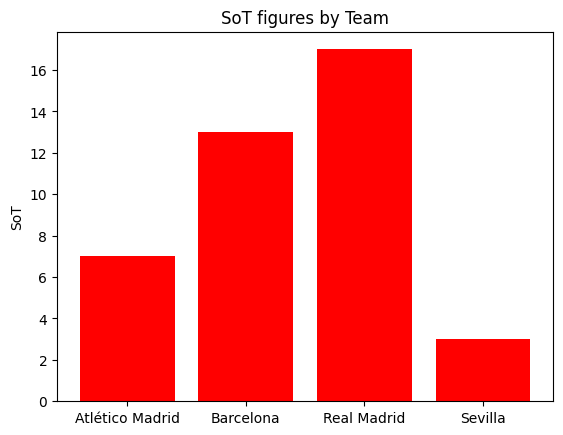

In [ ]:
plt.bar(subset_shooting['Squad'],subset_shooting['SoT'], color = 'red')
plt.title('SoT figures by Team')
plt.ylabel('SoT')
;

Specify URLS



In [ ]:
urls = ['https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures']

Loop through the URL list and append them to a pandas dataframe.



In [ ]:
epl_df_list = []

for url in urls:
    epl_df_list.append(pd.read_html(url,index_col=False)[0])
    epl_df = pd.concat(epl_df_list, axis=0, ignore_index=True)

Remove the NAN values



In [ ]:
epl_df = epl_df[epl_df['Wk'].notna()]

Rename the XG columns

In [ ]:
epl_df = epl_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})

Add the scores columns by slicing.



In [ ]:
epl_df['HomeScore'] = epl_df['Score'].str[0]
epl_df['AwayScore'] = epl_df['Score'].str[2]

Drop the irrelevant fields



In [ ]:
epl_df = epl_df.drop(['Match Report','Notes'],axis=1)


Order by date

In [ ]:
#convert to date

epl_df['Date'] = pd.to_datetime(epl_df['Date'])

In [ ]:
epl_df.sort_values(by='Date', inplace=True)

In [ ]:
epl_df = epl_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [ ]:
epl_df

,Wk,Day,Date,Time,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee
1732,1.0,Fri,2017-08-11,19:45,Arsenal,4,2.5,3,1.5,Leicester City,59387.0,Emirates Stadium,Mike Dean
1739,1.0,Sat,2017-08-12,17:30,Brighton,0,0.3,2,1.9,Manchester City,30415.0,The American Express Community Stadium,Michael Oliver
1733,1.0,Sat,2017-08-12,12:30,Watford,3,2.1,3,2.6,Liverpool,20407.0,Vicarage Road Stadium,Anthony Taylor
1734,1.0,Sat,2017-08-12,15:00,Crystal Palace,0,1.1,3,1.5,Huddersfield,25448.0,Selhurst Park,Jonathan Moss
1735,1.0,Sat,2017-08-12,15:00,West Brom,1,1.3,0,0.5,Bournemouth,25011.0,The Hawthorns,Robert Madley
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,38.0,Sun,2022-05-22,16:00,Leicester City,4,3.4,1,1.1,Southampton,32003.0,King Power Stadium,Jonathan Moss
438,38.0,Sun,2022-05-22,16:00,Brentford,1,0.8,2,1.3,Leeds United,16957.0,Brentford Community Stadium,Paul Tierney
446,38.0,Sun,2022-05-22,16:00,Burnley,1,1.6,2,1.8,Newcastle Utd,21361.0,Turf Moor,Craig Pawson
440,38.0,Sun,2022-05-22,16:00,Crystal Palace,1,0.6,0,0.7,Manchester Utd,25434.0,Selhurst Park,Martin Atkinson
